In [0]:
import keras
from keras.layers import Activation,BatchNormalization,Dense,Flatten,Conv2D,MaxPool2D,Dropout,Input,SeparableConv2D,add,GlobalAveragePooling2D
from keras.models import Model,Sequential
from keras.utils import plot_model as plt

Model: "XceptionNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, 128, 128, 32) 896         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_121 (BatchN (None, 128, 128, 32) 128         conv2d_25[0][0]                  
__________________________________________________________________________________________________
activation_121 (Activation)     (None, 128, 128, 32) 0           batch_normalization_121[0][0]    
________________________________________________________________________________________

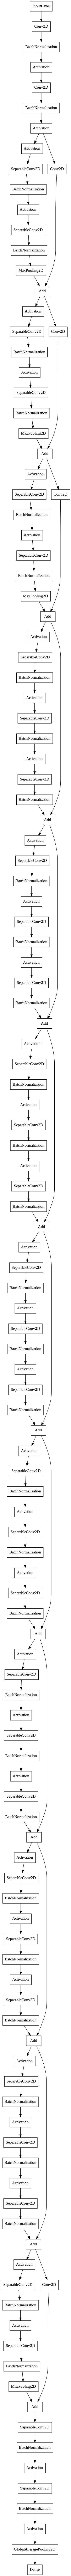

In [12]:
def entry_flow(inputs):
  x=Conv2D(32,3,strides=2,padding='same')(inputs)
  x=BatchNormalization()(x)
  x=Activation('relu')(x)
  
  x=Conv2D(64,3,padding='same')(x)
  x=BatchNormalization()(x)
  x=Activation('relu')(x)
  activations_prev_node=x
  for i in [128,256,728]:
    x=Activation('relu')(x)
    x=SeparableConv2D(i,3,padding='same')(x)
    x=BatchNormalization()(x)
  
    x=Activation('relu')(x)
    x=SeparableConv2D(i,3,padding='same')(x)
    x=BatchNormalization()(x)
  

    x=MaxPool2D(3,strides=2,padding='same')(x)

    residual=Conv2D(i,1,strides=2,padding='same')(activations_prev_node)
    x=add([x,residual])
    activations_prev_node=x
  return x


def middle_flow(x,num_blocks=8):
  activations_prev_node=x

  for _ in range(num_blocks):
    x=Activation('relu')(x)
    x=SeparableConv2D(728,3,padding='same')(x)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=SeparableConv2D(728,3,padding='same')(x)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=SeparableConv2D(728,3,padding='same')(x)
    x=BatchNormalization()(x)
    x=add([x,activations_prev_node])
    activations_prev_node=x
  return x

def exit_flow(x):
  activations_prev_node=x
  x=Activation('relu')(x)
  x=SeparableConv2D(728,3,padding='same')(x)
  x=BatchNormalization()(x)

  x=Activation('relu')(x)
  x=SeparableConv2D(1024,3,padding='same')(x)
  x=BatchNormalization()(x)
  x=MaxPool2D(3,strides=2,padding='same')(x)
  residual=Conv2D(1024,3,strides=2,padding='same')(activations_prev_node)
  x=add([x,residual])

  x=SeparableConv2D(1536,3,padding='same')(x)
  x=BatchNormalization()(x)
  x=Activation('relu')(x)
  x=SeparableConv2D(2048,3,padding='same')(x)
  x=BatchNormalization()(x)
  x=Activation('relu')(x)

  x=GlobalAveragePooling2D()(x)
  x=Dense(1,activation='linear')(x)
  return x

inputs=Input(shape=(256,256,3))
outputs=exit_flow(middle_flow(entry_flow(inputs)))
xception_net=Model(inputs=inputs,outputs=outputs,name='XceptionNet')
xception_net.summary()
plt(xception_net,show_layer_names=False)








